<a href="https://colab.research.google.com/github/Karush2807/Car_predictionModel/blob/main/car_predictionMODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf #for models
import pandas as pd #for reading and processing data
import seaborn as sms #for visualisation
from tensorflow.keras.layers import Normalization, Dense

***Data Preperation***

In [5]:
data=pd.read_csv("seocnd hand cars.csv", ",") #used to read csv seperated by comma

<ipython-input-5-4e60d522b328>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data=pd.read_csv("seocnd hand cars.csv", ",") #used to read csv seperated by comma


In [6]:
data.head() #shows the first 5 data or row from the given dataset

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [7]:
data.shape #will give the shape of data

(1000, 12)

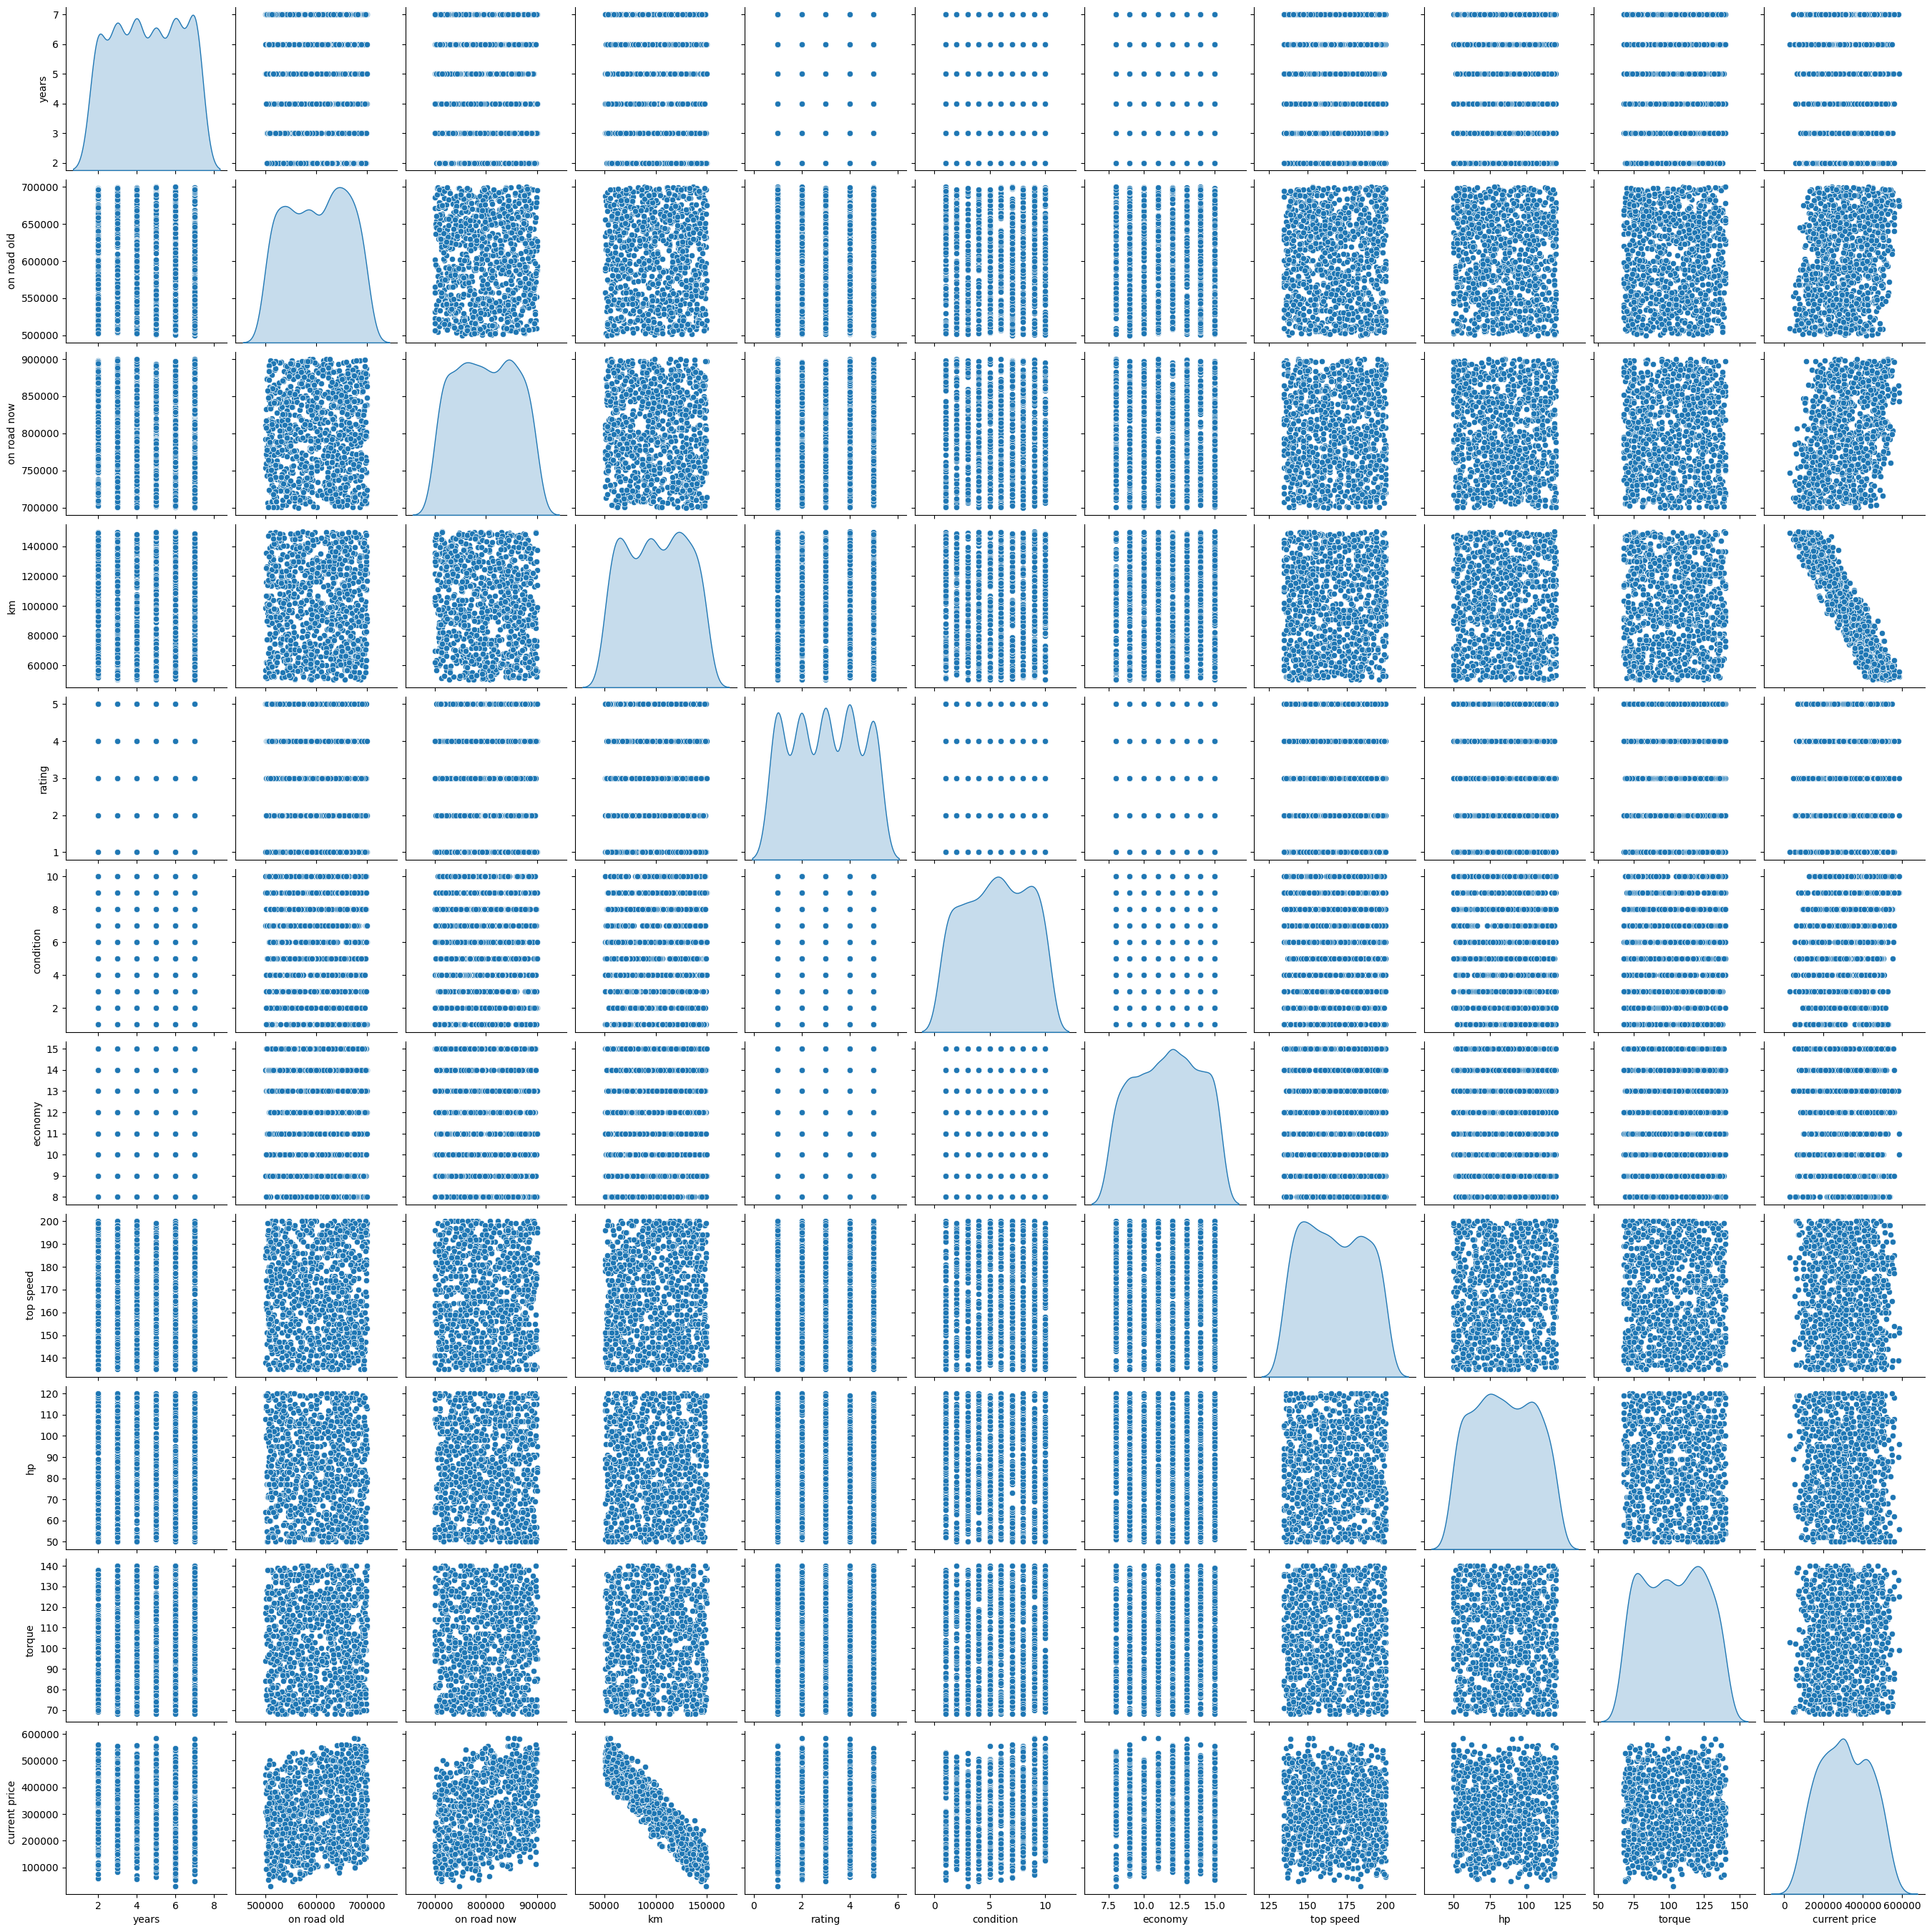

In [8]:
sms.pairplot(data[['years',	'on road old',	'on road now', 'km', 'rating',	'condition',	'economy',	'top speed',	'hp',	'torque',	'current price']], diag_kind='kde' )

In [13]:
tensor_data=tf.constant(data)
tensor_data=tf.cast(tensor_data, tf.float32) #converts datatype of tensor_Data to float32

tensor_data= tf.random.shuffle(tensor_data) #used to shuffle the data, so that the sysytem doesn't found any pattern or and order
print(tensor_data[:5])

tf.Tensor(
[[4.870000e+02 6.783460e+05 7.721560e+05 4.000000e+00 7.648000e+04
  2.000000e+00 7.000000e+00 1.200000e+01 1.670000e+02 6.400000e+01
  1.400000e+02 4.274960e+05]
 [5.960000e+02 6.761120e+05 7.915800e+05 2.000000e+00 1.395350e+05
  3.000000e+00 1.000000e+01 1.300000e+01 1.990000e+02 1.000000e+02
  8.400000e+01 2.260875e+05]
 [7.810000e+02 6.635290e+05 7.909440e+05 5.000000e+00 1.493190e+05
  5.000000e+00 6.000000e+00 9.000000e+00 1.490000e+02 6.700000e+01
  7.600000e+01 1.340350e+05]
 [5.000000e+00 6.913880e+05 8.113350e+05 6.000000e+00 6.155900e+04
  3.000000e+00 9.000000e+00 1.200000e+01 1.600000e+02 5.300000e+01
  1.050000e+02 5.311145e+05]
 [3.550000e+02 5.753980e+05 8.887010e+05 7.000000e+00 1.032220e+05
  2.000000e+00 1.000000e+00 9.000000e+00 1.980000e+02 7.800000e+01
  6.800000e+01 3.109870e+05]], shape=(5, 12), dtype=float32)


In [16]:
all_rows= tensor_data[:, 3:-1]
print(all_rows[:5])
print(all_rows.shape)

tf.Tensor(
[[4.00000e+00 7.64800e+04 2.00000e+00 7.00000e+00 1.20000e+01 1.67000e+02
  6.40000e+01 1.40000e+02]
 [2.00000e+00 1.39535e+05 3.00000e+00 1.00000e+01 1.30000e+01 1.99000e+02
  1.00000e+02 8.40000e+01]
 [5.00000e+00 1.49319e+05 5.00000e+00 6.00000e+00 9.00000e+00 1.49000e+02
  6.70000e+01 7.60000e+01]
 [6.00000e+00 6.15590e+04 3.00000e+00 9.00000e+00 1.20000e+01 1.60000e+02
  5.30000e+01 1.05000e+02]
 [7.00000e+00 1.03222e+05 2.00000e+00 1.00000e+00 9.00000e+00 1.98000e+02
  7.80000e+01 6.80000e+01]], shape=(5, 8), dtype=float32)
(1000, 8)


In [18]:
y=tensor_data[:, -1]
print(y[:5].shape)
y=tf.expand_dims(y, axis=-1)
print(y[:5])

(5,)
tf.Tensor(
[[427496. ]
 [226087.5]
 [134035. ]
 [531114.5]
 [310987. ]], shape=(5, 1), dtype=float32)


In [20]:
normalizer=Normalization(mean=5, variance=4)
x_normalized=tf.constant([[3, 4, 5, 6, 7],
                          [4, 5, 6, 7, 8]])
normalizer(x_normalized)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-0.5,  0. ,  0.5,  1. ,  1.5]], dtype=float32)>

In [22]:
normalizer=Normalization(
)
x_normalized=tf.constant([[3, 4, 5, 6, 7],
                          [4, 5, 6, 7, 8]])

normalizer.adapt(x_normalized)
normalizer(x_normalized)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1., -1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1.]], dtype=float32)>

In [25]:
model= tf.keras.Sequential([
    normalizer,
    Dense(1),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normaliza  (None, 5)                 11        
 tion)                                                           
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 17 (72.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 11 (48.00 Byte)
_________________________________________________________________
